# Julia 機器學習：Clustering 分群模型

## 作業 028：資料分群

從提供的檔案中讀取資料，利用分群模型將資料分群後並將資料視覺化。資料中有 15 群，並利用 k-means 去對資料做分群。資料取自 http://cs.uef.fi/sipu/datasets/

In [1]:
using Clustering, CSV, DataFrames

## 讀取資料

In [3]:
data = CSV.read("s1-set.csv")
first(data, 10)

10×2 DataFrame
│ Row │ x      │ y      │
│     │ Int64  │ Int64  │
├─────┼────────┼────────┤
│ 1   │ 664159 │ 550946 │
│ 2   │ 665845 │ 557965 │
│ 3   │ 597173 │ 575538 │
│ 4   │ 618600 │ 551446 │
│ 5   │ 635690 │ 608046 │
│ 6   │ 588100 │ 557588 │
│ 7   │ 582015 │ 546191 │
│ 8   │ 604678 │ 574577 │
│ 9   │ 572029 │ 518313 │
│ 10  │ 604737 │ 574591 │

In [6]:
X = Matrix(data[:, 1:2])'

2×5000 LinearAlgebra.Adjoint{Int64,Array{Int64,2}}:
 664159  665845  597173  618600  635690  …  691827  650661  599647  684091
 550946  557965  575538  551446  608046     863963  861267  858702  842566

In [7]:
k = 15
result = kmeans(X, k)

KmeansResult{Array{Float64,2},Float64,Int64}([244654.88563049852 802634.0276923077 … 398870.0484330484 122212.69008264462; 847642.0410557184 324907.5969230769 … 404924.06552706554 560783.7231404958], [12, 12, 12, 12, 12, 12, 12, 12, 12, 12  …  4, 4, 4, 4, 4, 4, 4, 4, 4, 4], [3.868603093541992e9, 3.784863740838379e9, 8.956930531298828e7, 6.740235058618164e8, 1.976029744717041e9, 6.258253758146973e8, 1.402054662494873e9, 3.6132858852539062e6, 4.345366158831543e9, 3.3965333364257812e6  …  2.818333299736328e8, 5.894317032715332e9, 2.948263640739258e9, 2.094690922705078e7, 5.5591316869765625e9, 1.75454214078125e8, 2.2580043328320312e8, 7.600214612407227e8, 6.145172446421875e9, 2.748227945390625e8], [341, 325, 339, 375, 105, 336, 327, 685, 210, 636, 314, 297, 117, 351, 242], [341, 325, 339, 375, 105, 336, 327, 685, 210, 636, 314, 297, 117, 351, 242], 2.0103529478706934e13, 18, true)

In [8]:
data[!, :cluster] = string.(assignments(result));

In [9]:
result.centers

2×15 Array{Float64,2}:
 244655.0  802634.0  168841.0  678035.0  …  368076.0  398870.0  122213.0
 847642.0  324908.0  345737.0  857998.0     574672.0  404924.0  560784.0

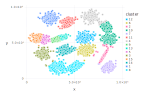

In [13]:
using Gadfly
plot(data, x="x", y="y", color="cluster", Geom.point)